# Business Problem:

Boston House Pricing Dataset dataset contains information about housing prices in Boston, and our goal is to predict house prices based on various features.

# Dataset Overview:
The Boston dataset consists of 506 samples and 14 feature variables.
Our goal is to predict the median value of owner-occupied homes (MEDV) using the given features.
Feature Variables:
Here are the key features:

    * CRIM: Per capita crime rate by town.
    * ZN: Proportion of residential land zoned for large lots.
    * INDUS: Proportion of non-retail business acres per town.
    * CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
    * NOX: Nitric oxide concentration (parts per 10 million).
    * RM: Average number of rooms per dwelling.
    * AGE: Proportion of owner-occupied units built before 1940.
    * DIS: Weighted distances to Boston employment centers.
    * RAD: Index of accessibility to radial highways.
    * TAX: Full-value property tax rate per 10k dollar.
    * PTRATIO: Pupil-teacher ratio by town.
    * B: Derived feature related to the proportion of African American residents.
    * LSTAT: Percentage of lower-status population.
    * MEDV: Median value of owner-occupied homes in 1000s dollar (our target variable).

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
dataset = pd.read_csv("Boston.csv")
dataset.columns=dataset.columns.str.upper()

In [3]:
# Shape of the datsaet
dataset.shape

(506, 15)

In [4]:
# First 5 rows of the dataset
dataset.head()

,UNNAMED: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
## Summarizing The Stats of the data
dataset.describe()

,UNNAMED: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
## Check the missing Values
dataset.isnull().sum()

UNNAMED: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
BLACK         0
LSTAT         0
MEDV          0
dtype: int64

 There are no missing values in the dataset.

In [7]:
# drop Unnamed column
dataset.drop("UNNAMED: 0",axis=1,inplace=True)

In [8]:
dataset.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


# Exploratory Data Analysis

<Axes: >

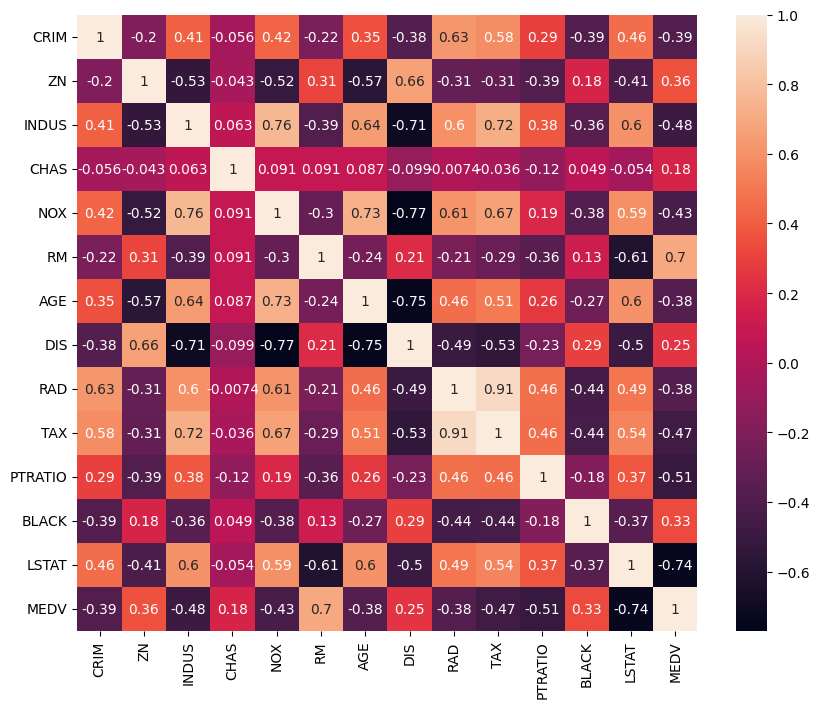

In [9]:
## Correlation
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True)

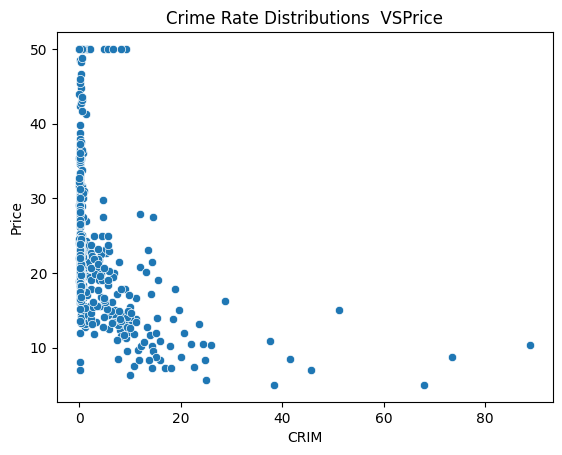

In [11]:
plt.title("Crime Rate Distributions  VSPrice")
sns.scatterplot(x='CRIM',data=dataset,y='MEDV')
plt.xlabel("CRIM")
plt.ylabel("Price")
plt.show()

When Crime Rate(CRIM) is increasing Price is decreasing. They are inversely corelated.

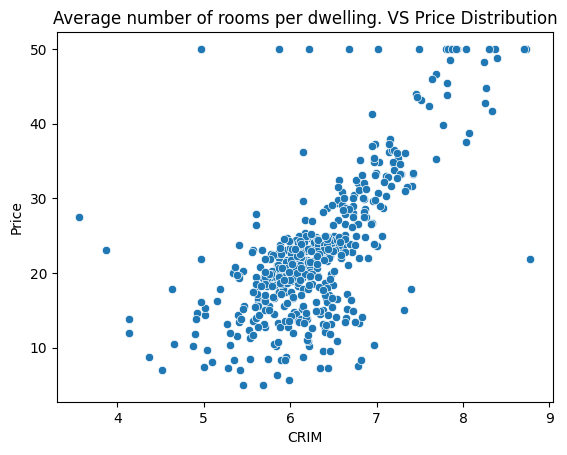

In [12]:
plt.title("Average number of rooms per dwelling. VS Price Distribution")
sns.scatterplot(x='RM',data=dataset,y='MEDV')
plt.xlabel("CRIM")
plt.ylabel("Price")
plt.show()

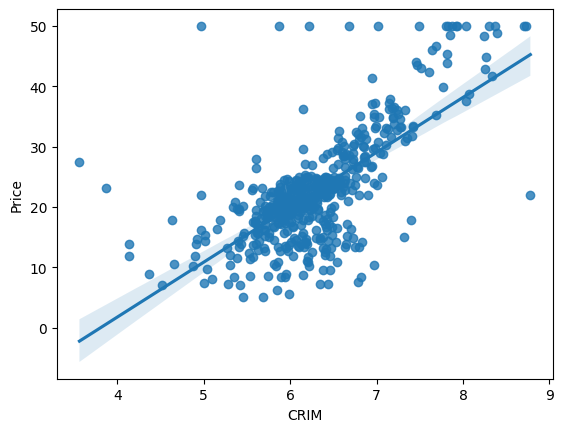

In [13]:
sns.regplot(x="RM",y="MEDV",data=dataset)
plt.xlabel("CRIM")
plt.ylabel("Price")
plt.show()

There is a positive correlation between Average number of rooms per dwelling and Price. When one value increases other one  also increases.

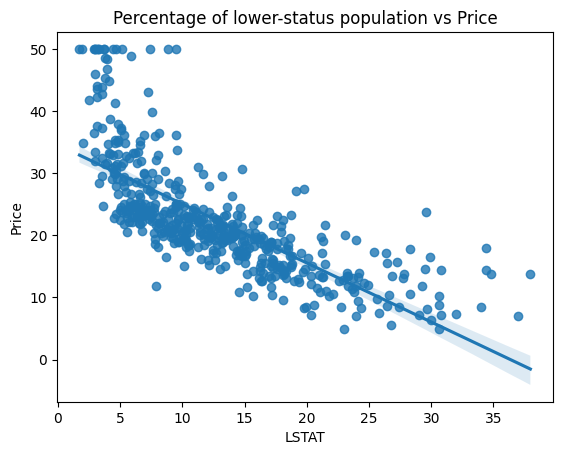

In [14]:
plt.title("Percentage of lower-status population vs Price")
sns.regplot(x="LSTAT",y="MEDV",data=dataset)
plt.xlabel("LSTAT")
plt.ylabel("Price")
plt.show()

There is a negative Corelation between LSTAT and Price.

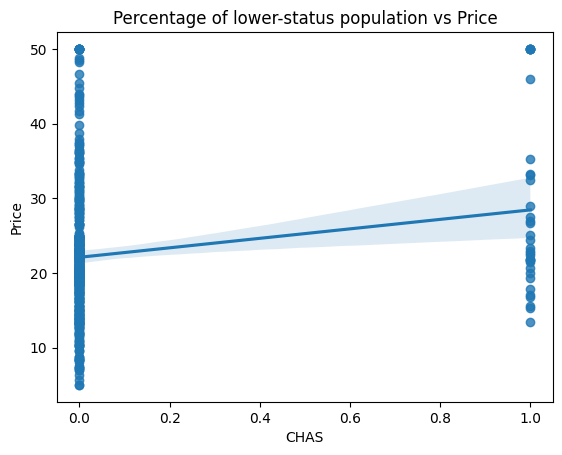

In [15]:
plt.title("Percentage of lower-status population vs Price")
sns.regplot(x="CHAS",y="MEDV",data=dataset)
plt.xlabel("CHAS")
plt.ylabel("Price")
plt.show()

It is superimportant  to know that their is a linear realation  between independent and dependent variable.

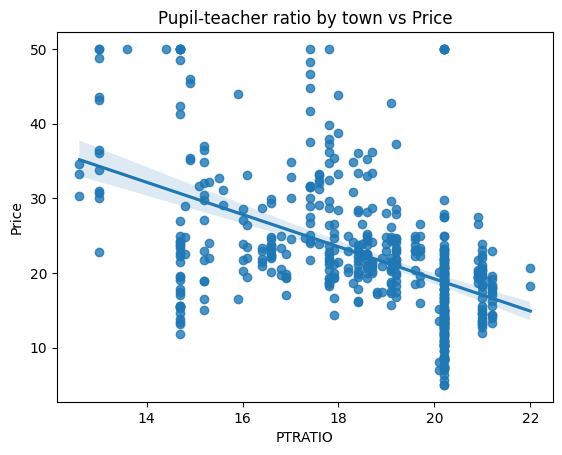

In [16]:
plt.title("Pupil-teacher ratio by town vs Price")
sns.regplot(x="PTRATIO",y="MEDV",data=dataset)
plt.xlabel("PTRATIO")
plt.ylabel("Price")
plt.show()

There is a negative corelation between PITRATIO and Price. Price is increasing when PITRATIO is decreasing.

# Model Creation

In [17]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [18]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [19]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [21]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2,385.96,19.52
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,100.19,16.22


In [22]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
import pickle
pickle.dump(scaler,open('scailing.pkl','wb'))

In [27]:
X_train=scaler.fit_transform(X_train)

In [28]:
X_test=scaler.transform(X_test)

d:\gitr_hub\ml_project\boston_pricing\Boston_House_ML_Project\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [29]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [87]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [88]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

## Model Training

In [89]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [90]:
regression.fit(X_train,y_train)

LinearRegression()

In [104]:
# Print the coefficients and the intercept
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [105]:
print(regression.intercept_)

23.01581920903955


In [106]:
# Prediction With Test Data
reg_pred=regression.predict(X_test)

In [107]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

## Assumptions

In [4]:
## plot a scatter plot for the prediction
plt.title("Actual Price Vs Predicted Price")
plt.scatter(y_test,reg_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

NameError: name 'plt' is not defined

* There is a linear relation between actual and predicted value.
* There are some outliers also.

In [98]:
# Residuals is bascially the errors betweeen predicted value and actual value
residuals=y_test-reg_pred

In [99]:
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: MEDV, Length: 152, dtype: float64

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


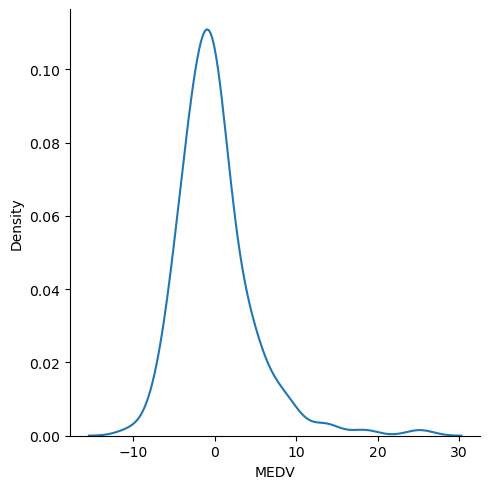

In [100]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

* For Residuals (errors between actual and predicted price) if graph is normal distribued then error will be less and model will be good
* There are some outliers at the end .

In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1627098714574053
21.51744423117722
4.638689926172821


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [103]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7112260057484932


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [110]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6840226584639308

In [ ]:
regression.predict(scaler.transform(boston.data[0].reshape(1,-1)))

## Pickling The Model file For Deployment

In [133]:
import pickle

In [134]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [139]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [148]:
## Prediction
pickled_model.predict(scaler.transform([[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98]]))

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])